<a href="https://colab.research.google.com/github/luckysimarda/EVDA/blob/main/Final_Project_EVDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Social Media Analytics (SMA)**

Analisis Sentimen Ridwan Kamil

Lucky Simarda

In [29]:
import warnings; warnings.simplefilter('ignore')
import nltk

try:
    import google.colab
    IN_COLAB = True
    !wget https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/taudataDDGsna.py
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/contoh.pdf
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/slang.txt
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/stopwords_id.txt
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/stopwords_en.txt
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/kata_dasar.txt
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/wn-ind-def.tab
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/wn-msa-all.tab
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/ind_SA.csv
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/all_indo_man_tag_corpus_model.crf.tagger

    !pip install --upgrade spacy python-crfsuite unidecode textblob sastrawi sklearn-pycrfsuite
    !pip install --upgrade unidecode twython tweepy beautifulsoup4 tika
    !python -m spacy download en
    !python -m spacy download xx
    !python -m spacy download en_core_web_sm
    nltk.download('popular')
except:
    IN_COLAB = False
    print("Running the code locally, please make sure all the python module versions agree with colab environment and all data/assets downloaded")

--2022-06-12 10:59:21--  https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/taudataDDGsna.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8030 (7.8K) [text/plain]
Saving to: ‘taudataDDGsna.py.1’

taudataDDGsna.py.1  100%[===================>]   7.84K  --.-KB/s    in 0s      

2022-06-12 10:59:21 (53.2 MB/s) - ‘taudataDDGsna.py.1’ saved [8030/8030]

mkdir: cannot create directory ‘data’: File exists
--2022-06-12 10:59:21--  https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/contoh.pdf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP reque

In [30]:
import taudataDDGsna as tau
import tweepy, json, urllib.request, requests
from urllib.request import Request, urlopen
from twython import TwythonStreamer
from bs4 import BeautifulSoup as bs
from tqdm import tqdm
"Done"

'Done'

Aturan, bentuk data, & error codes twitter
https://dev.twitter.com/rest/public/rate-limiting

https://dev.twitter.com/overview/terms/agreement-and-policy

https://dev.twitter.com/overview/api/response-codes

https://dev.twitter.com/overview/api/tweets

In [31]:
# Contoh API Keys (Sesuaikan dengan API keys masing-masing)
Ck = 'KehsRTCTPXEZrldIbeaierGjl' # consumer_key
Cs = '4S6xC8PUCBwUUja3OIHL7AZpcr1K44RpnuHRMHX41JfWmRWDg0' # consumer_secret
At = '1535517559193501696-dgStDyvJX7RRofhHEojrwR16cNrdGN' # access_token
As = '0zuOrqRiIhrhjsfOMes7bwZX0gXzTczFOQtZ6Jpb6YMPX' # access_secret

'Done'

'Done'

In [32]:
import tweepy

auth = tweepy.auth.OAuthHandler(Ck, Cs)
auth.set_access_token(At, As)
api = tweepy.API(auth, wait_on_rate_limit=True, timeout=180, retry_count=5, retry_delay=3)
usr_ = api.verify_credentials()
print('Welcome "{}" you are now connected to twitter server'.format(usr_.name))

Welcome "luckysimarda" you are now connected to twitter server


In [33]:
qry = 'ridwan kamil'
N = 1000 # jumlah N tweet "terkini" yang ingin diambil
T = []
for post in tqdm(tweepy.Cursor(api.search_tweets, q=qry, lang='id', tweet_mode='extended').items(N)):
    T.append(post)
    
"Done"

1000it [00:15, 63.94it/s]


'Done'

In [34]:
T[0]._json

{'contributors': None,
 'coordinates': None,
 'created_at': 'Sun Jun 12 11:00:14 +0000 2022',
 'display_text_range': [0, 76],
 'entities': {'hashtags': [],
  'media': [{'display_url': 'pic.twitter.com/Ikd2WK8XMq',
    'expanded_url': 'https://twitter.com/nanjikho/status/1535918706794328064/video/1',
    'id': 1535918602368749570,
    'id_str': '1535918602368749570',
    'indices': [53, 76],
    'media_url': 'http://pbs.twimg.com/ext_tw_video_thumb/1535918602368749570/pu/img/vM_DxOX1-k5RJynA.jpg',
    'media_url_https': 'https://pbs.twimg.com/ext_tw_video_thumb/1535918602368749570/pu/img/vM_DxOX1-k5RJynA.jpg',
    'sizes': {'large': {'h': 1280, 'resize': 'fit', 'w': 720},
     'medium': {'h': 1200, 'resize': 'fit', 'w': 675},
     'small': {'h': 680, 'resize': 'fit', 'w': 383},
     'thumb': {'h': 150, 'resize': 'crop', 'w': 150}},
    'source_status_id': 1535918706794328064,
    'source_status_id_str': '1535918706794328064',
    'source_user_id': 1524436828400484352,
    'source_user_i

In [35]:
# T bukan sekedar list of tweets 
tweet = [t._json for t in T]
print(' Berhasil mendapatkan {} tweets'.format(len(tweet)))

 Berhasil mendapatkan 1000 tweets


In [36]:
# Data pertama
tweet[0]

{'contributors': None,
 'coordinates': None,
 'created_at': 'Sun Jun 12 11:00:14 +0000 2022',
 'display_text_range': [0, 76],
 'entities': {'hashtags': [],
  'media': [{'display_url': 'pic.twitter.com/Ikd2WK8XMq',
    'expanded_url': 'https://twitter.com/nanjikho/status/1535918706794328064/video/1',
    'id': 1535918602368749570,
    'id_str': '1535918602368749570',
    'indices': [53, 76],
    'media_url': 'http://pbs.twimg.com/ext_tw_video_thumb/1535918602368749570/pu/img/vM_DxOX1-k5RJynA.jpg',
    'media_url_https': 'https://pbs.twimg.com/ext_tw_video_thumb/1535918602368749570/pu/img/vM_DxOX1-k5RJynA.jpg',
    'sizes': {'large': {'h': 1280, 'resize': 'fit', 'w': 720},
     'medium': {'h': 1200, 'resize': 'fit', 'w': 675},
     'small': {'h': 680, 'resize': 'fit', 'w': 383},
     'thumb': {'h': 150, 'resize': 'crop', 'w': 150}},
    'source_status_id': 1535918706794328064,
    'source_status_id_str': '1535918706794328064',
    'source_user_id': 1524436828400484352,
    'source_user_i

In [37]:
# Datanya berbentuk JSON
tweet[0]['created_at'], tweet[0]['full_text']

('Sun Jun 12 11:00:14 +0000 2022',
 'RT @nanjikho: Eril \U0001f972 pak ridwan kamil &amp; bu cinta https://t.co/Ikd2WK8XMq')

In [38]:
# Contoh mengakses data spesifik pada tweet yang pertama:
print('tweet pertama oleh "{}" : "{}"'.format(tweet[0]['user']['screen_name'],tweet[0]['full_text']))

tweet pertama oleh "jenggnotnjengg" : "RT @nanjikho: Eril 🥲 pak ridwan kamil &amp; bu cinta https://t.co/Ikd2WK8XMq"


**Menyimpan hasil crawling (sederhana ke Text file berformat json)**

In [39]:
import json 
def saveTweets(tweets, file='Tweets.json'): #in Json Format
    with open(file, 'w') as f:
        for t in tweets:
            try:
                f.write(json.dumps(t)+'\n')
            except:
                pass

In [40]:
# Menyimpan hasil crawling twitter
fileName = 'Tweets_2021.json'
saveTweets(tweet, file=fileName)
print('Saved to '+fileName)

Saved to Tweets_2021.json


**Load Kembali?**

In [41]:
def loadTweets(file='Tweets.json'):
    f=open(file,encoding='utf-8', errors ='ignore', mode='r')
    T=f.readlines();f.close()
    for i,t in enumerate(T):
        T[i] = json.loads(t.strip())
    return T

In [42]:
# Me-load kembali jika (misal) analisa ingin dilakukan di lain waktu
# Sengaja nama variabelnya saya bedakan (T2)
T2 = loadTweets(file=fileName)
print('tweet pertama oleh "{}" : "{}"'.format(T2[0]['user']['screen_name'],T2[0]['full_text']))

tweet pertama oleh "jenggnotnjengg" : "RT @nanjikho: Eril 🥲 pak ridwan kamil &amp; bu cinta https://t.co/Ikd2WK8XMq"


In [43]:
# Contoh mengambil hanya data tweet
D = [t['full_text'] for t in T2]
D[:5] # 5 tweet pertama

['RT @nanjikho: Eril \U0001f972 pak ridwan kamil &amp; bu cinta https://t.co/Ikd2WK8XMq',
 'RT @kumparan: Jenazah Emmeril Kahn Mumtadz (Eril) tiba di bandara Soekarno-Hatta (Soetta), Minggu (12/6). Setelah proses serah terima, jena…',
 'RT @nanjikho: Eril \U0001f972 pak ridwan kamil &amp; bu cinta https://t.co/Ikd2WK8XMq',
 'RT @nanjikho: Eril \U0001f972 pak ridwan kamil &amp; bu cinta https://t.co/Ikd2WK8XMq',
 'RT @KompasTV: Keluarga Ridwan Kamil Imbau Masyarakat Hormati Privasi Geraldine Beldi yang Menemukan Jenazah Eril https://t.co/wODOBfPwRd ht…']

In [44]:
import pandas as pd

pdObj = pd.read_json('/content/Tweets_2021.json', lines=True)
pdObj.to_csv('crawling.csv', index=False)

In [45]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import nltk 
import string
import re
%matplotlib inline
pd.set_option('display.max_colwidth', 100)

In [46]:
# Load dataset
def load_data():
    data = pd.read_csv('/content/crawling.csv')
    return data

In [47]:
tweet_df = load_data()
tweet_df.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,metadata,source,...,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,lang,quoted_status_id,quoted_status_id_str,quoted_status
0,2022-06-12 11:00:14+00:00,1535940032632041472,1535940032632041472,RT @nanjikho: Eril 🥲 pak ridwan kamil &amp; bu cinta https://t.co/Ikd2WK8XMq,False,"[0, 76]","{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'nanjikho', 'name': 'nanjikho'...","{'media': [{'id': 1535918602368749570, 'id_str': '1535918602368749570', 'indices': [53, 76], 'me...","{'iso_language_code': 'in', 'result_type': 'recent'}","<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",...,False,638,0,False,False,0.0,in,NaN,NaN,NaN
1,2022-06-12 11:00:14+00:00,1535940031751532545,1535940031751532544,"RT @kumparan: Jenazah Emmeril Kahn Mumtadz (Eril) tiba di bandara Soekarno-Hatta (Soetta), Mingg...",False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'kumparan', 'name': 'kumparan'...",NaN,"{'iso_language_code': 'in', 'result_type': 'recent'}","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",...,False,9,0,False,False,NaN,in,NaN,NaN,NaN
2,2022-06-12 11:00:10+00:00,1535940012893622272,1535940012893622272,RT @nanjikho: Eril 🥲 pak ridwan kamil &amp; bu cinta https://t.co/Ikd2WK8XMq,False,"[0, 76]","{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'nanjikho', 'name': 'nanjikho'...","{'media': [{'id': 1535918602368749570, 'id_str': '1535918602368749570', 'indices': [53, 76], 'me...","{'iso_language_code': 'in', 'result_type': 'recent'}","<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",...,False,638,0,False,False,0.0,in,NaN,NaN,NaN
3,2022-06-12 10:59:55+00:00,1535939951065321473,1535939951065321472,RT @nanjikho: Eril 🥲 pak ridwan kamil &amp; bu cinta https://t.co/Ikd2WK8XMq,False,"[0, 76]","{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'nanjikho', 'name': 'nanjikho'...","{'media': [{'id': 1535918602368749570, 'id_str': '1535918602368749570', 'indices': [53, 76], 'me...","{'iso_language_code': 'in', 'result_type': 'recent'}","<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",...,False,638,0,False,False,0.0,in,NaN,NaN,NaN
4,2022-06-12 10:59:52+00:00,1535939936922517504,1535939936922517504,RT @KompasTV: Keluarga Ridwan Kamil Imbau Masyarakat Hormati Privasi Geraldine Beldi yang Menemu...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'KompasTV', 'name': 'KOMPAS TV...",NaN,"{'iso_language_code': 'in', 'result_type': 'recent'}","<a href=""https://mobile.twitter.com"" rel=""nofollow"">Twitter Web App</a>",...,False,1,0,False,False,0.0,in,NaN,NaN,NaN


In [48]:
print('Dataset size:',tweet_df.shape)
print('Columns are:',tweet_df.columns)

Dataset size: (1000, 31)
Columns are: Index(['created_at', 'id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'extended_entities', 'metadata',
       'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'retweeted_status', 'is_quote_status', 'retweet_count',
       'favorite_count', 'favorited', 'retweeted', 'possibly_sensitive',
       'lang', 'quoted_status_id', 'quoted_status_id_str', 'quoted_status'],
      dtype='object')


In [49]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   created_at                 1000 non-null   object 
 1   id                         1000 non-null   int64  
 2   id_str                     1000 non-null   int64  
 3   full_text                  1000 non-null   object 
 4   truncated                  1000 non-null   bool   
 5   display_text_range         1000 non-null   object 
 6   entities                   1000 non-null   object 
 7   extended_entities          507 non-null    object 
 8   metadata                   1000 non-null   object 
 9   source                     1000 non-null   object 
 10  in_reply_to_status_id      21 non-null     float64
 11  in_reply_to_status_id_str  21 non-null     float64
 12  in_reply_to_user_id        21 non-null     float64
 13  in_reply_to_user_id_str    21 non-null     float6

In [86]:
tweet_df['possibly_sensitive'].unique()

array([ 0., nan,  1.])

In [125]:
from numpy.lib.type_check import nan_to_num
import pandas as pd
import numpy as np
tweet_df.fillna(0) 
tweet_df.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,metadata,source,...,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,lang,quoted_status_id,quoted_status_id_str,quoted_status,word count
0,2022-06-12 11:00:14+00:00,1535940032632041472,1535940032632041472,RT @nanjikho: Eril 🥲 pak ridwan kamil &amp; bu cinta https://t.co/Ikd2WK8XMq,False,"[0, 76]","{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'nanjikho', 'name': 'nanjikho'...","{'media': [{'id': 1535918602368749570, 'id_str': '1535918602368749570', 'indices': [53, 76], 'me...","{'iso_language_code': 'in', 'result_type': 'recent'}","<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",...,638,0,False,False,0.0,in,NaN,NaN,NaN,11
1,2022-06-12 11:00:14+00:00,1535940031751532545,1535940031751532544,"RT @kumparan: Jenazah Emmeril Kahn Mumtadz (Eril) tiba di bandara Soekarno-Hatta (Soetta), Mingg...",False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'kumparan', 'name': 'kumparan'...",NaN,"{'iso_language_code': 'in', 'result_type': 'recent'}","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",...,9,0,False,False,1.0,in,NaN,NaN,NaN,19
2,2022-06-12 11:00:10+00:00,1535940012893622272,1535940012893622272,RT @nanjikho: Eril 🥲 pak ridwan kamil &amp; bu cinta https://t.co/Ikd2WK8XMq,False,"[0, 76]","{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'nanjikho', 'name': 'nanjikho'...","{'media': [{'id': 1535918602368749570, 'id_str': '1535918602368749570', 'indices': [53, 76], 'me...","{'iso_language_code': 'in', 'result_type': 'recent'}","<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",...,638,0,False,False,0.0,in,NaN,NaN,NaN,11
3,2022-06-12 10:59:55+00:00,1535939951065321473,1535939951065321472,RT @nanjikho: Eril 🥲 pak ridwan kamil &amp; bu cinta https://t.co/Ikd2WK8XMq,False,"[0, 76]","{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'nanjikho', 'name': 'nanjikho'...","{'media': [{'id': 1535918602368749570, 'id_str': '1535918602368749570', 'indices': [53, 76], 'me...","{'iso_language_code': 'in', 'result_type': 'recent'}","<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",...,638,0,False,False,0.0,in,NaN,NaN,NaN,11
4,2022-06-12 10:59:52+00:00,1535939936922517504,1535939936922517504,RT @KompasTV: Keluarga Ridwan Kamil Imbau Masyarakat Hormati Privasi Geraldine Beldi yang Menemu...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'KompasTV', 'name': 'KOMPAS TV...",NaN,"{'iso_language_code': 'in', 'result_type': 'recent'}","<a href=""https://mobile.twitter.com"" rel=""nofollow"">Twitter Web App</a>",...,1,0,False,False,0.0,in,NaN,NaN,NaN,17


In [126]:
tweet_df.describe()

,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,geo,coordinates,contributors,retweet_count,favorite_count,possibly_sensitive,quoted_status_id,quoted_status_id_str,word count
count,1.000000e+03,1.000000e+03,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,0.0,0.0,0.0,1000.000000,1000.000000,1000.000000,4.000000e+00,4.000000e+00,1000.000000
mean,1.535929e+18,1.535929e+18,1.535693e+18,1.535693e+18,5.222914e+17,5.222914e+17,NaN,NaN,NaN,307.018000,4.613000,0.329000,1.535722e+18,1.535722e+18,15.270000
std,5.979493e+12,5.979493e+12,7.073101e+14,7.073101e+14,5.533062e+17,5.533062e+17,NaN,NaN,NaN,331.724046,86.808634,0.470085,2.340146e+14,2.340146e+14,5.947813
min,1.535918e+18,1.535918e+18,1.532658e+18,1.532658e+18,1.437273e+07,1.437273e+07,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.535455e+18,1.535455e+18,3.000000
25%,1.535924e+18,1.535924e+18,1.535840e+18,1.535840e+18,2.313551e+08,2.313551e+08,NaN,NaN,NaN,1.000000,0.000000,0.000000,1.535561e+18,1.535561e+18,11.000000
50%,1.535929e+18,1.535929e+18,1.535910e+18,1.535910e+18,7.596928e+17,7.596928e+17,NaN,NaN,NaN,75.000000,0.000000,0.000000,1.535758e+18,1.535758e+18,11.000000
75%,1.535934e+18,1.535934e+18,1.535920e+18,1.535920e+18,7.596928e+17,7.596928e+17,NaN,NaN,NaN,639.000000,0.000000,1.000000,1.535919e+18,1.535919e+18,20.000000
max,1.535940e+18,1.535940e+18,1.535935e+18,1.535935e+18,1.518891e+18,1.518891e+18,NaN,NaN,NaN,2953.000000,2681.000000,1.000000,1.535919e+18,1.535919e+18,46.000000


In [127]:
# check the number of positive vs. negative tagged sentences
positives = tweet_df['possibly_sensitive'][tweet_df.possibly_sensitive == 1 ]
negatives = tweet_df['possibly_sensitive'][tweet_df.possibly_sensitive == 0 ]

print('Total length of the data is:         {}'.format(tweet_df.shape[0]))
print('No. of positve tagged sentences is:  {}'.format(len(positives)))
print('No. of negative tagged sentences is: {}'.format(len(negatives)))

Total length of the data is:         1000
No. of positve tagged sentences is:  329
No. of negative tagged sentences is: 671


In [128]:
# get a word count per of text
def word_count(words):
    return len(words.split())

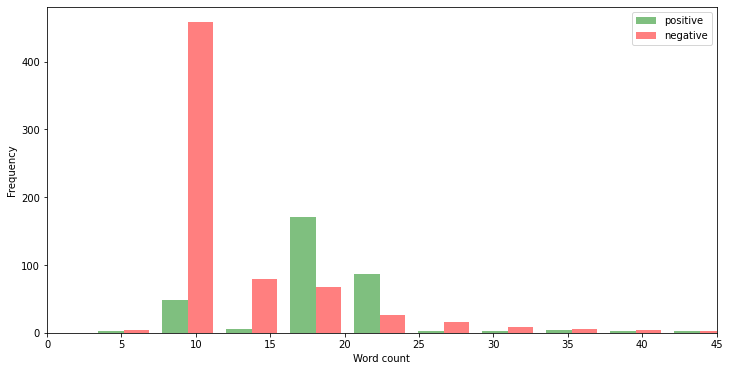

In [129]:
# plot word count distribution for both positive and negative 

tweet_df['word count'] = tweet_df['full_text'].apply(word_count)
p = tweet_df['word count'][tweet_df.possibly_sensitive == 1]
n = tweet_df['word count'][tweet_df.possibly_sensitive == 0]
plt.figure(figsize=(12,6))
plt.xlim(0,45)
plt.xlabel('Word count')
plt.ylabel('Frequency')
g = plt.hist([p, n], color=['g','r'], alpha=0.5, label=['positive','negative'])
plt.legend(loc='upper right')

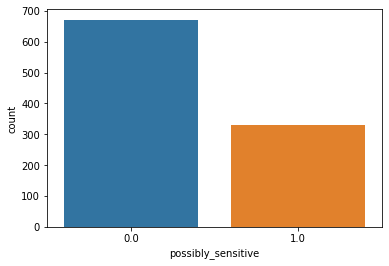

In [130]:
%matplotlib inline
sns.countplot(tweet_df['possibly_sensitive'])

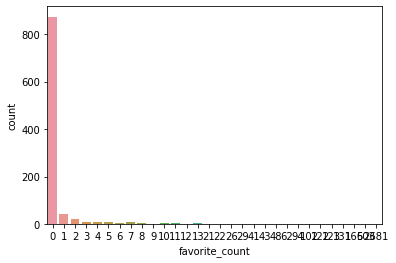

In [131]:
sns.countplot(x = 'favorite_count', data = tweet_df)

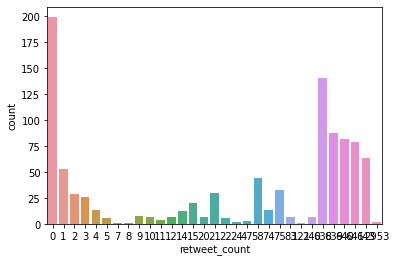

In [51]:
sns.countplot(x = 'retweet_count', data = tweet_df)

In [52]:
df  = pd.DataFrame(tweet_df[['user', 'full_text']])

**Pre-processing text data**

Most of the text data are cleaned by following below steps.

1. Remove punctuations
2. Tokenization - Converting a sentence into list of words
3. Remove stopwords
4. Lammetization/stemming - Tranforming any form of a word to its root word

**Remove punctuations**

In [53]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [54]:
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

df['Tweet_punct'] = df['full_text'].apply(lambda x: remove_punct(x))
df.head(10)

,user,full_text,Tweet_punct
0,"{'id': 808685645849731072, 'id_str': '808685645849731072', 'name': 'ansr', 'screen_name': 'jengg...",RT @nanjikho: Eril 🥲 pak ridwan kamil &amp; bu cinta https://t.co/Ikd2WK8XMq,RT nanjikho Eril 🥲 pak ridwan kamil amp bu cinta httpstcoIkdWKXMq
1,"{'id': 77972436, 'id_str': '77972436', 'name': '\u200eص', 'screen_name': 'yasminsofiana', 'locat...","RT @kumparan: Jenazah Emmeril Kahn Mumtadz (Eril) tiba di bandara Soekarno-Hatta (Soetta), Mingg...",RT kumparan Jenazah Emmeril Kahn Mumtadz Eril tiba di bandara SoekarnoHatta Soetta Minggu Setel...
2,"{'id': 1530537439, 'id_str': '1530537439', 'name': 'aci☁', 'screen_name': 'mej1kuhibinigyu', 'lo...",RT @nanjikho: Eril 🥲 pak ridwan kamil &amp; bu cinta https://t.co/Ikd2WK8XMq,RT nanjikho Eril 🥲 pak ridwan kamil amp bu cinta httpstcoIkdWKXMq
3,"{'id': 1101843556648407040, 'id_str': '1101843556648407040', 'name': '🌙', 'screen_name': 'dailyr...",RT @nanjikho: Eril 🥲 pak ridwan kamil &amp; bu cinta https://t.co/Ikd2WK8XMq,RT nanjikho Eril 🥲 pak ridwan kamil amp bu cinta httpstcoIkdWKXMq
4,"{'id': 1193967346982871040, 'id_str': '1193967346982871040', 'name': '😊', 'screen_name': 'Xrhjg'...",RT @KompasTV: Keluarga Ridwan Kamil Imbau Masyarakat Hormati Privasi Geraldine Beldi yang Menemu...,RT KompasTV Keluarga Ridwan Kamil Imbau Masyarakat Hormati Privasi Geraldine Beldi yang Menemuka...
5,"{'id': 1641909620, 'id_str': '1641909620', 'name': 'Addin 😋', 'screen_name': 'alealegratis', 'lo...",RT @nanjikho: Eril 🥲 pak ridwan kamil &amp; bu cinta https://t.co/Ikd2WK8XMq,RT nanjikho Eril 🥲 pak ridwan kamil amp bu cinta httpstcoIkdWKXMq
6,"{'id': 4694360347, 'id_str': '4694360347', 'name': 'Anisa', 'screen_name': 'anisayufebia', 'loca...",RT @nanjikho: Eril 🥲 pak ridwan kamil &amp; bu cinta https://t.co/Ikd2WK8XMq,RT nanjikho Eril 🥲 pak ridwan kamil amp bu cinta httpstcoIkdWKXMq
7,"{'id': 1223174940708331520, 'id_str': '1223174940708331520', 'name': 'Je', 'screen_name': 'aiich...",RT @nanjikho: Eril 🥲 pak ridwan kamil &amp; bu cinta https://t.co/Ikd2WK8XMq,RT nanjikho Eril 🥲 pak ridwan kamil amp bu cinta httpstcoIkdWKXMq
8,"{'id': 529278620, 'id_str': '529278620', 'name': 'Adit', 'screen_name': 'adityatrd', 'location':...",RT @nanjikho: Eril 🥲 pak ridwan kamil &amp; bu cinta https://t.co/Ikd2WK8XMq,RT nanjikho Eril 🥲 pak ridwan kamil amp bu cinta httpstcoIkdWKXMq
9,"{'id': 1193127939694448640, 'id_str': '1193127939694448640', 'name': 'karare光', 'screen_name': '...",RT @nanjikho: Eril 🥲 pak ridwan kamil &amp; bu cinta https://t.co/Ikd2WK8XMq,RT nanjikho Eril 🥲 pak ridwan kamil amp bu cinta httpstcoIkdWKXMq


**Tokenization**

In [55]:
def tokenization(text):
    text = re.split('\W+', text)
    return text

df['Tweet_tokenized'] = df['Tweet_punct'].apply(lambda x: tokenization(x.lower()))
df.head()

,user,full_text,Tweet_punct,Tweet_tokenized
0,"{'id': 808685645849731072, 'id_str': '808685645849731072', 'name': 'ansr', 'screen_name': 'jengg...",RT @nanjikho: Eril 🥲 pak ridwan kamil &amp; bu cinta https://t.co/Ikd2WK8XMq,RT nanjikho Eril 🥲 pak ridwan kamil amp bu cinta httpstcoIkdWKXMq,"[rt, nanjikho, eril, pak, ridwan, kamil, amp, bu, cinta, httpstcoikdwkxmq]"
1,"{'id': 77972436, 'id_str': '77972436', 'name': '\u200eص', 'screen_name': 'yasminsofiana', 'locat...","RT @kumparan: Jenazah Emmeril Kahn Mumtadz (Eril) tiba di bandara Soekarno-Hatta (Soetta), Mingg...",RT kumparan Jenazah Emmeril Kahn Mumtadz Eril tiba di bandara SoekarnoHatta Soetta Minggu Setel...,"[rt, kumparan, jenazah, emmeril, kahn, mumtadz, eril, tiba, di, bandara, soekarnohatta, soetta, ..."
2,"{'id': 1530537439, 'id_str': '1530537439', 'name': 'aci☁', 'screen_name': 'mej1kuhibinigyu', 'lo...",RT @nanjikho: Eril 🥲 pak ridwan kamil &amp; bu cinta https://t.co/Ikd2WK8XMq,RT nanjikho Eril 🥲 pak ridwan kamil amp bu cinta httpstcoIkdWKXMq,"[rt, nanjikho, eril, pak, ridwan, kamil, amp, bu, cinta, httpstcoikdwkxmq]"
3,"{'id': 1101843556648407040, 'id_str': '1101843556648407040', 'name': '🌙', 'screen_name': 'dailyr...",RT @nanjikho: Eril 🥲 pak ridwan kamil &amp; bu cinta https://t.co/Ikd2WK8XMq,RT nanjikho Eril 🥲 pak ridwan kamil amp bu cinta httpstcoIkdWKXMq,"[rt, nanjikho, eril, pak, ridwan, kamil, amp, bu, cinta, httpstcoikdwkxmq]"
4,"{'id': 1193967346982871040, 'id_str': '1193967346982871040', 'name': '😊', 'screen_name': 'Xrhjg'...",RT @KompasTV: Keluarga Ridwan Kamil Imbau Masyarakat Hormati Privasi Geraldine Beldi yang Menemu...,RT KompasTV Keluarga Ridwan Kamil Imbau Masyarakat Hormati Privasi Geraldine Beldi yang Menemuka...,"[rt, kompastv, keluarga, ridwan, kamil, imbau, masyarakat, hormati, privasi, geraldine, beldi, y..."


**Remove stopwords**

In [56]:
# preprocess "D": kumpulan tweet
slangFixId = tau.loadCorpus(file = 'data/slang.txt', sep=':')
stopId, _ = tau.LoadStopWords(lang='id')
stopId.add("rt")

list(stopId)[:10]

['sebegitu',
 'apakah',
 'menurut',
 'diantaranya',
 'beginikah',
 'lain',
 'betulkah',
 'diberikannya',
 'seketika',
 'setengah']

In [57]:
stopword = nltk.corpus.stopwords.words('english')

In [58]:
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
df['Tweet_nonstop'] = df['Tweet_tokenized'].apply(lambda x: remove_stopwords(x))
df.head(10)

,user,full_text,Tweet_punct,Tweet_tokenized,Tweet_nonstop
0,"{'id': 808685645849731072, 'id_str': '808685645849731072', 'name': 'ansr', 'screen_name': 'jengg...",RT @nanjikho: Eril 🥲 pak ridwan kamil &amp; bu cinta https://t.co/Ikd2WK8XMq,RT nanjikho Eril 🥲 pak ridwan kamil amp bu cinta httpstcoIkdWKXMq,"[rt, nanjikho, eril, pak, ridwan, kamil, amp, bu, cinta, httpstcoikdwkxmq]","[rt, nanjikho, eril, pak, ridwan, kamil, amp, bu, cinta, httpstcoikdwkxmq]"
1,"{'id': 77972436, 'id_str': '77972436', 'name': '\u200eص', 'screen_name': 'yasminsofiana', 'locat...","RT @kumparan: Jenazah Emmeril Kahn Mumtadz (Eril) tiba di bandara Soekarno-Hatta (Soetta), Mingg...",RT kumparan Jenazah Emmeril Kahn Mumtadz Eril tiba di bandara SoekarnoHatta Soetta Minggu Setel...,"[rt, kumparan, jenazah, emmeril, kahn, mumtadz, eril, tiba, di, bandara, soekarnohatta, soetta, ...","[rt, kumparan, jenazah, emmeril, kahn, mumtadz, eril, tiba, di, bandara, soekarnohatta, soetta, ..."
2,"{'id': 1530537439, 'id_str': '1530537439', 'name': 'aci☁', 'screen_name': 'mej1kuhibinigyu', 'lo...",RT @nanjikho: Eril 🥲 pak ridwan kamil &amp; bu cinta https://t.co/Ikd2WK8XMq,RT nanjikho Eril 🥲 pak ridwan kamil amp bu cinta httpstcoIkdWKXMq,"[rt, nanjikho, eril, pak, ridwan, kamil, amp, bu, cinta, httpstcoikdwkxmq]","[rt, nanjikho, eril, pak, ridwan, kamil, amp, bu, cinta, httpstcoikdwkxmq]"
3,"{'id': 1101843556648407040, 'id_str': '1101843556648407040', 'name': '🌙', 'screen_name': 'dailyr...",RT @nanjikho: Eril 🥲 pak ridwan kamil &amp; bu cinta https://t.co/Ikd2WK8XMq,RT nanjikho Eril 🥲 pak ridwan kamil amp bu cinta httpstcoIkdWKXMq,"[rt, nanjikho, eril, pak, ridwan, kamil, amp, bu, cinta, httpstcoikdwkxmq]","[rt, nanjikho, eril, pak, ridwan, kamil, amp, bu, cinta, httpstcoikdwkxmq]"
4,"{'id': 1193967346982871040, 'id_str': '1193967346982871040', 'name': '😊', 'screen_name': 'Xrhjg'...",RT @KompasTV: Keluarga Ridwan Kamil Imbau Masyarakat Hormati Privasi Geraldine Beldi yang Menemu...,RT KompasTV Keluarga Ridwan Kamil Imbau Masyarakat Hormati Privasi Geraldine Beldi yang Menemuka...,"[rt, kompastv, keluarga, ridwan, kamil, imbau, masyarakat, hormati, privasi, geraldine, beldi, y...","[rt, kompastv, keluarga, ridwan, kamil, imbau, masyarakat, hormati, privasi, geraldine, beldi, y..."
5,"{'id': 1641909620, 'id_str': '1641909620', 'name': 'Addin 😋', 'screen_name': 'alealegratis', 'lo...",RT @nanjikho: Eril 🥲 pak ridwan kamil &amp; bu cinta https://t.co/Ikd2WK8XMq,RT nanjikho Eril 🥲 pak ridwan kamil amp bu cinta httpstcoIkdWKXMq,"[rt, nanjikho, eril, pak, ridwan, kamil, amp, bu, cinta, httpstcoikdwkxmq]","[rt, nanjikho, eril, pak, ridwan, kamil, amp, bu, cinta, httpstcoikdwkxmq]"
6,"{'id': 4694360347, 'id_str': '4694360347', 'name': 'Anisa', 'screen_name': 'anisayufebia', 'loca...",RT @nanjikho: Eril 🥲 pak ridwan kamil &amp; bu cinta https://t.co/Ikd2WK8XMq,RT nanjikho Eril 🥲 pak ridwan kamil amp bu cinta httpstcoIkdWKXMq,"[rt, nanjikho, eril, pak, ridwan, kamil, amp, bu, cinta, httpstcoikdwkxmq]","[rt, nanjikho, eril, pak, ridwan, kamil, amp, bu, cinta, httpstcoikdwkxmq]"
7,"{'id': 1223174940708331520, 'id_str': '1223174940708331520', 'name': 'Je', 'screen_name': 'aiich...",RT @nanjikho: Eril 🥲 pak ridwan kamil &amp; bu cinta https://t.co/Ikd2WK8XMq,RT nanjikho Eril 🥲 pak ridwan kamil amp bu cinta httpstcoIkdWKXMq,"[rt, nanjikho, eril, pak, ridwan, kamil, amp, bu, cinta, httpstcoikdwkxmq]","[rt, nanjikho, eril, pak, ridwan, kamil, amp, bu, cinta, httpstcoikdwkxmq]"
8,"{'id': 529278620, 'id_str': '529278620', 'name': 'Adit', 'screen_name': 'adityatrd', 'location':...",RT @nanjikho: Eril 🥲 pak ridwan kamil &amp; bu cinta https://t.co/Ikd2WK8XMq,RT nanjikho Eril 🥲 pak ridwan kamil amp bu cinta httpstcoIkdWKXMq,"[rt, nanjikho, eril, pak, ridwan, kamil, amp, bu, cinta, httpstcoikdwkxmq]","[rt, nanjikho, eril, pak, ridwan, kamil, amp, bu, cinta, httpstcoikdwkxmq]"
9,"{'id': 1193127939694448640, 'id_str': '1193127939694448640', 'name': 'karare光', 'screen_name': '...",RT @nanjikho: 

In [59]:
from tqdm import tqdm 

cleanD = []
for t in tqdm(D):
    doc = tau.cleanText(t, fix=slangFixId, lan='id', stops = stopId)
    cleanD.append(doc)
    
"Done"

100%|██████████| 1000/1000 [00:00<00:00, 2201.27it/s]


'Done'

In [60]:
print(D[0], end='\n\n')
print(cleanD[0], end='\n\n')

RT @nanjikho: Eril 🥲 pak ridwan kamil &amp; bu cinta https://t.co/Ikd2WK8XMq

nanjikho eril ridwan kamil bu cinta



In [61]:
# Save ke txt ... lalu nanti akan di upload ke Voyant Tools
filename = 'tweets_2021.txt'
with open(filename, 'w') as f:
    for T in cleanD:
        f.write(T+'\n')
        
"Tweets Saved!"

'Tweets Saved!'

**Stemming and Lammitization**

In [62]:
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

df['Tweet_stemmed'] = df['Tweet_nonstop'].apply(lambda x: stemming(x))
df.head()

,user,full_text,Tweet_punct,Tweet_tokenized,Tweet_nonstop,Tweet_stemmed
0,"{'id': 808685645849731072, 'id_str': '808685645849731072', 'name': 'ansr', 'screen_name': 'jengg...",RT @nanjikho: Eril 🥲 pak ridwan kamil &amp; bu cinta https://t.co/Ikd2WK8XMq,RT nanjikho Eril 🥲 pak ridwan kamil amp bu cinta httpstcoIkdWKXMq,"[rt, nanjikho, eril, pak, ridwan, kamil, amp, bu, cinta, httpstcoikdwkxmq]","[rt, nanjikho, eril, pak, ridwan, kamil, amp, bu, cinta, httpstcoikdwkxmq]","[rt, nanjikho, eril, pak, ridwan, kamil, amp, bu, cinta, httpstcoikdwkxmq]"
1,"{'id': 77972436, 'id_str': '77972436', 'name': '\u200eص', 'screen_name': 'yasminsofiana', 'locat...","RT @kumparan: Jenazah Emmeril Kahn Mumtadz (Eril) tiba di bandara Soekarno-Hatta (Soetta), Mingg...",RT kumparan Jenazah Emmeril Kahn Mumtadz Eril tiba di bandara SoekarnoHatta Soetta Minggu Setel...,"[rt, kumparan, jenazah, emmeril, kahn, mumtadz, eril, tiba, di, bandara, soekarnohatta, soetta, ...","[rt, kumparan, jenazah, emmeril, kahn, mumtadz, eril, tiba, di, bandara, soekarnohatta, soetta, ...","[rt, kumparan, jenazah, emmeril, kahn, mumtadz, eril, tiba, di, bandara, soekarnohatta, soetta, ..."
2,"{'id': 1530537439, 'id_str': '1530537439', 'name': 'aci☁', 'screen_name': 'mej1kuhibinigyu', 'lo...",RT @nanjikho: Eril 🥲 pak ridwan kamil &amp; bu cinta https://t.co/Ikd2WK8XMq,RT nanjikho Eril 🥲 pak ridwan kamil amp bu cinta httpstcoIkdWKXMq,"[rt, nanjikho, eril, pak, ridwan, kamil, amp, bu, cinta, httpstcoikdwkxmq]","[rt, nanjikho, eril, pak, ridwan, kamil, amp, bu, cinta, httpstcoikdwkxmq]","[rt, nanjikho, eril, pak, ridwan, kamil, amp, bu, cinta, httpstcoikdwkxmq]"
3,"{'id': 1101843556648407040, 'id_str': '1101843556648407040', 'name': '🌙', 'screen_name': 'dailyr...",RT @nanjikho: Eril 🥲 pak ridwan kamil &amp; bu cinta https://t.co/Ikd2WK8XMq,RT nanjikho Eril 🥲 pak ridwan kamil amp bu cinta httpstcoIkdWKXMq,"[rt, nanjikho, eril, pak, ridwan, kamil, amp, bu, cinta, httpstcoikdwkxmq]","[rt, nanjikho, eril, pak, ridwan, kamil, amp, bu, cinta, httpstcoikdwkxmq]","[rt, nanjikho, eril, pak, ridwan, kamil, amp, bu, cinta, httpstcoikdwkxmq]"
4,"{'id': 1193967346982871040, 'id_str': '1193967346982871040', 'name': '😊', 'screen_name': 'Xrhjg'...",RT @KompasTV: Keluarga Ridwan Kamil Imbau Masyarakat Hormati Privasi Geraldine Beldi yang Menemu...,RT KompasTV Keluarga Ridwan Kamil Imbau Masyarakat Hormati Privasi Geraldine Beldi yang Menemuka...,"[rt, kompastv, keluarga, ridwan, kamil, imbau, masyarakat, hormati, privasi, geraldine, beldi, y...","[rt, kompastv, keluarga, ridwan, kamil, imbau, masyarakat, hormati, privasi, geraldine, beldi, y...","[rt, kompastv, keluarga, ridwan, kamil, imbau, masyarakat, hormati, privasi, geraldin, beldi, ya..."


In [63]:
wn = nltk.WordNetLemmatizer()

def lemmatizer(text):
    text = [wn.lemmatize(word) for word in text]
    return text

df['Tweet_lemmatized'] = df['Tweet_nonstop'].apply(lambda x: lemmatizer(x))
df.head()

,user,full_text,Tweet_punct,Tweet_tokenized,Tweet_nonstop,Tweet_stemmed,Tweet_lemmatized
0,"{'id': 808685645849731072, 'id_str': '808685645849731072', 'name': 'ansr', 'screen_name': 'jengg...",RT @nanjikho: Eril 🥲 pak ridwan kamil &amp; bu cinta https://t.co/Ikd2WK8XMq,RT nanjikho Eril 🥲 pak ridwan kamil amp bu cinta httpstcoIkdWKXMq,"[rt, nanjikho, eril, pak, ridwan, kamil, amp, bu, cinta, httpstcoikdwkxmq]","[rt, nanjikho, eril, pak, ridwan, kamil, amp, bu, cinta, httpstcoikdwkxmq]","[rt, nanjikho, eril, pak, ridwan, kamil, amp, bu, cinta, httpstcoikdwkxmq]","[rt, nanjikho, eril, pak, ridwan, kamil, amp, bu, cinta, httpstcoikdwkxmq]"
1,"{'id': 77972436, 'id_str': '77972436', 'name': '\u200eص', 'screen_name': 'yasminsofiana', 'locat...","RT @kumparan: Jenazah Emmeril Kahn Mumtadz (Eril) tiba di bandara Soekarno-Hatta (Soetta), Mingg...",RT kumparan Jenazah Emmeril Kahn Mumtadz Eril tiba di bandara SoekarnoHatta Soetta Minggu Setel...,"[rt, kumparan, jenazah, emmeril, kahn, mumtadz, eril, tiba, di, bandara, soekarnohatta, soetta, ...","[rt, kumparan, jenazah, emmeril, kahn, mumtadz, eril, tiba, di, bandara, soekarnohatta, soetta, ...","[rt, kumparan, jenazah, emmeril, kahn, mumtadz, eril, tiba, di, bandara, soekarnohatta, soetta, ...","[rt, kumparan, jenazah, emmeril, kahn, mumtadz, eril, tiba, di, bandara, soekarnohatta, soetta, ..."
2,"{'id': 1530537439, 'id_str': '1530537439', 'name': 'aci☁', 'screen_name': 'mej1kuhibinigyu', 'lo...",RT @nanjikho: Eril 🥲 pak ridwan kamil &amp; bu cinta https://t.co/Ikd2WK8XMq,RT nanjikho Eril 🥲 pak ridwan kamil amp bu cinta httpstcoIkdWKXMq,"[rt, nanjikho, eril, pak, ridwan, kamil, amp, bu, cinta, httpstcoikdwkxmq]","[rt, nanjikho, eril, pak, ridwan, kamil, amp, bu, cinta, httpstcoikdwkxmq]","[rt, nanjikho, eril, pak, ridwan, kamil, amp, bu, cinta, httpstcoikdwkxmq]","[rt, nanjikho, eril, pak, ridwan, kamil, amp, bu, cinta, httpstcoikdwkxmq]"
3,"{'id': 1101843556648407040, 'id_str': '1101843556648407040', 'name': '🌙', 'screen_name': 'dailyr...",RT @nanjikho: Eril 🥲 pak ridwan kamil &amp; bu cinta https://t.co/Ikd2WK8XMq,RT nanjikho Eril 🥲 pak ridwan kamil amp bu cinta httpstcoIkdWKXMq,"[rt, nanjikho, eril, pak, ridwan, kamil, amp, bu, cinta, httpstcoikdwkxmq]","[rt, nanjikho, eril, pak, ridwan, kamil, amp, bu, cinta, httpstcoikdwkxmq]","[rt, nanjikho, eril, pak, ridwan, kamil, amp, bu, cinta, httpstcoikdwkxmq]","[rt, nanjikho, eril, pak, ridwan, kamil, amp, bu, cinta, httpstcoikdwkxmq]"
4,"{'id': 1193967346982871040, 'id_str': '1193967346982871040', 'name': '😊', 'screen_name': 'Xrhjg'...",RT @KompasTV: Keluarga Ridwan Kamil Imbau Masyarakat Hormati Privasi Geraldine Beldi yang Menemu...,RT KompasTV Keluarga Ridwan Kamil Imbau Masyarakat Hormati Privasi Geraldine Beldi yang Menemuka...,"[rt, kompastv, keluarga, ridwan, kamil, imbau, masyarakat, hormati, privasi, geraldine, beldi, y...","[rt, kompastv, keluarga, ridwan, kamil, imbau, masyarakat, hormati, privasi, geraldine, beldi, y...","[rt, kompastv, keluarga, ridwan, kamil, imbau, masyarakat, hormati, privasi, geraldin, beldi, ya...","[rt, kompastv, keluarga, ridwan, kamil, imbau, masyarakat, hormati, privasi, geraldine, beldi, y..."


In [64]:
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
    return text

**Vectorisation**

In [65]:
countVectorizer = CountVectorizer(analyzer=clean_text) 
countVector = countVectorizer.fit_transform(df['full_text'])
print('{} Number of tweets has {} words'.format(countVector.shape[0], countVector.shape[1]))
#print(countVectorizer.get_feature_names())

1000 Number of tweets has 1561 words


In [66]:
count_vect_df = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names())
count_vect_df.head()

,,aa,aamiin,aar,aareriv,abisin,abouttng,ada,adalah,adik,...,youtub,zara,ziarah,zonafilsuf,zonedo,ดห,ปตาร,ม,ยซ,วใจย
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


HashTag Analysis

Frequency-Based

Bisa ditambahkan analisa hashtags analysis ini dari waktu ke waktu

In [67]:
import re

HTfilters = set(['zz', 'architec', 'prize', 'stirli', 'architect', 'london', 'cpd', 'design', 'stirling', 'photogr', 'gemini', 
                 'mule', 'karaoke', 'playing', 'official', 'berita', 'follow', 'retweet', 'mufc', 'ntms', 'infolimit', 'eeaa', 
                 'eaa', 'cfc', 'caprico', 'breaking','news', 'libra', 'mereka', 'brankas', 'psikolog', 'aquarius', 'klc'])
# modifikasi HTfilters sesuai data kamu
HT = {'hashtags':[]}
count = 0
getHashTags = re.compile(r"#(\w+)")
for i, d in tqdm(enumerate(D)):
    hashtags = re.findall(getHashTags, d)
    if hashtags:
        TG = []
        for tag in hashtags:
            dTag = str(tag).strip().lower()
            if len(dTag)>2:
                add = True
                for f in HTfilters:
                    if f in dTag:
                        add=False; break
                if add:
                    TG.append('#'+dTag); count += 1
            HT['hashtags'].append(TG)
print('Found {} number of hashtags'.format(count))

1000it [00:00, 106416.60it/s]

Found 111 number of hashtags


100%|██████████| 153/153 [00:00<00:00, 580749.78it/s]


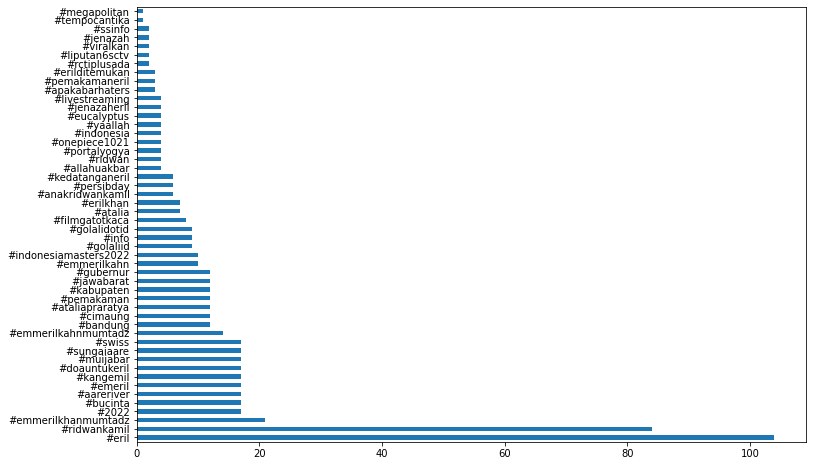

In [68]:
import pandas as pd

N = 50 # Number of top frequent hashtags to be plotted

dtHT = [x for t in tqdm(HT['hashtags']) for x in t] # any(h not in x for h in HTfilters)
dtHT = pd.Series(dtHT)
dtHT = dtHT.value_counts()
dtHT = dtHT.sort_index()
dtHT = dtHT.sort_values(ascending = False) 
dtHT.to_csv('hashTags_2021.csv', encoding='utf8')
dtHT = dtHT.iloc[:N]

p = dtHT.plot(kind='barh', figsize=(12,8), legend = False)

In [134]:
# sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB


#tensorflow
import tensorflow.compat.v2 as tf
import tensorflow_datasets as tfds

# Utility
import pandas as pd
import numpy as np 
import warnings
warnings.filterwarnings('ignore')
import re
import string
import pickle

In [135]:
X = tweet_df['full_text'].values
y = tweet_df['possibly_sensitive'].values

In [136]:
print(X.shape)
print(y.shape)

(1000,)
(1000,)


In [137]:
#Convert a collection of raw documents to a matrix of TF-IDF features.
vector = TfidfVectorizer(sublinear_tf=True)
X = vector.fit_transform(X)
print(f'Vector fitted.')
print('No. of feature_words: ', len(vector.get_feature_names()))

Vector fitted.
No. of feature_words:  1589


In [138]:
print(X.shape)
print(y.shape)

(1000, 1589)
(1000,)


In [139]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=101)

In [101]:
print("X_train", X_train.shape)
print("y_train", y_train.shape)
print()
print("X_test", X_test.shape)
print("y_test", y_test.shape)

X_train (800, 1589)
y_train (800,)

X_test (200, 1589)
y_test (200,)


**Model Building**

Model evaluating function

In [140]:
def model_Evaluate(model):
    #accuracy of model on training data
    acc_train=model.score(X_train, y_train)
    #accuracy of model on test data
    acc_test=model.score(X_test, y_test)
    
    print('Accuracy of model on training data : {}'.format(acc_train*100))
    print('Accuracy of model on testing data : {} \n'.format(acc_test*100))

    # Predict values for Test dataset
    y_pred = model.predict(X_test)

    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)

    categories  = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cf_matrix, annot = labels, cmap = 'Reds',fmt = '',
                xticklabels = categories, yticklabels = categories)

    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

Accuracy of model on training data : 96.125
Accuracy of model on testing data : 91.0 

              precision    recall  f1-score   support

         0.0       0.91      0.97      0.94       138
         1.0       0.92      0.77      0.84        62

    accuracy                           0.91       200
   macro avg       0.91      0.87      0.89       200
weighted avg       0.91      0.91      0.91       200



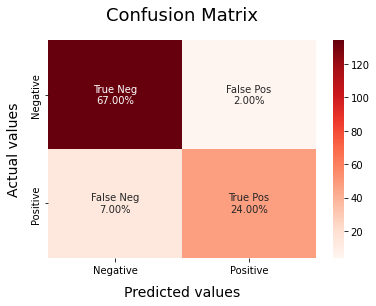

In [142]:
svm = LinearSVC()
svm.fit(X_train, y_train)
model_Evaluate(svm)

Accuracy of model on training data : 96.0
Accuracy of model on testing data : 93.5 

              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95       138
         1.0       0.98      0.81      0.88        62

    accuracy                           0.94       200
   macro avg       0.95      0.90      0.92       200
weighted avg       0.94      0.94      0.93       200



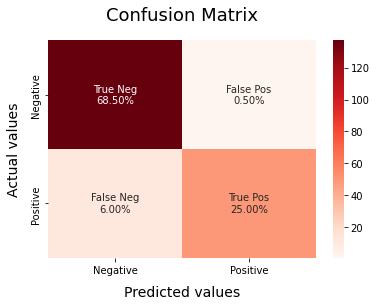

In [143]:
rf = RandomForestClassifier(n_estimators = 20, criterion = 'entropy', max_depth=50)
rf.fit(X_train, y_train)
model_Evaluate(rf)